In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

On charge les données

In [2]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


## Plotting

### Simple plot

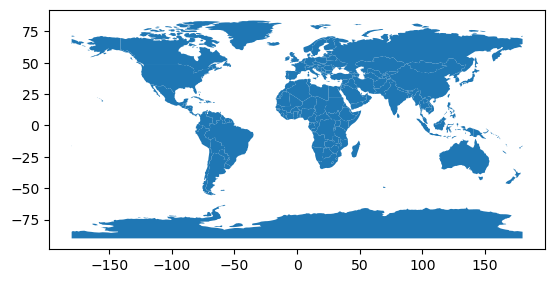

In [3]:
world.plot()
plt.show()

### Choropleth Maps

On va garder dans cet exemple que les pays qui ont un capital positif et on supprime l'Antartique

In [4]:
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

On crée une colonne pour le PIB par habitant

In [5]:
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

c:\Users\pc\anaconda3\lib\site-packages\geopandas\geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Pour avoir un choropleth on ajoute juste la variable column indiquant les valeurs pour chaque couleur

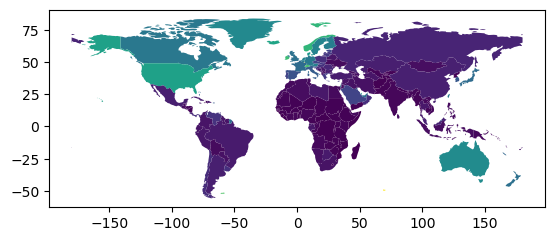

In [6]:
world.plot(column='gdp_per_cap')
plt.show()

### Creating a legend

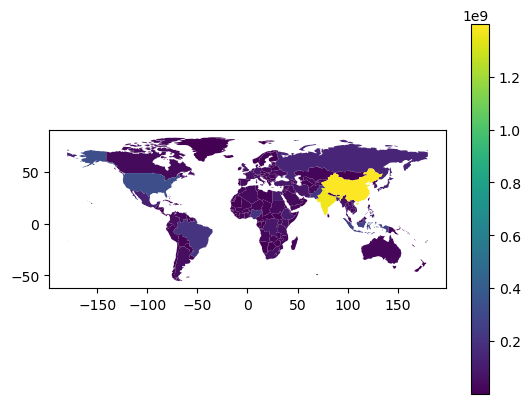

In [7]:
world.plot(column='pop_est', legend=True)
plt.show()

However, the default appearance of the legend and plot axes may not be desirable. One can define the plot axes (with ax) and the legend axes (with cax) and then pass those in to the plot() call. The following example uses mpl_toolkits to vertically align the plot axes and the legend axes

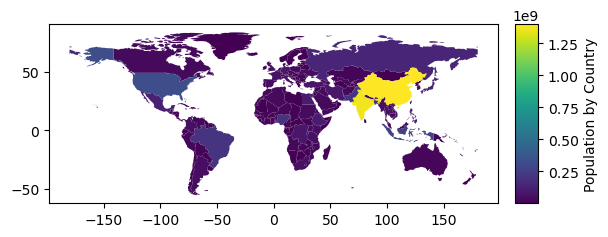

In [8]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1)

divider = make_axes_locatable(ax)

cax = divider.append_axes("right", size="5%", pad=0.1)

world.plot(column='pop_est', ax=ax, legend=True, legend_kwds={'label': "Population by Country"}, cax=cax)
plt.show()

Pour ecrire une légende en bas

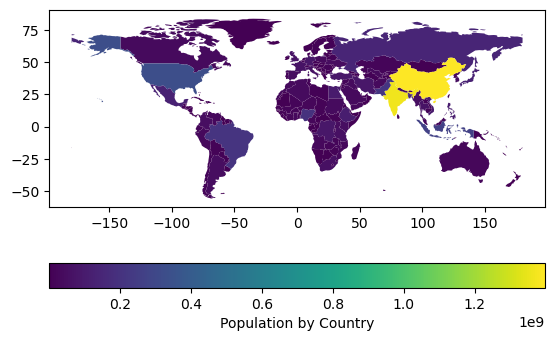

In [9]:
fig, ax = plt.subplots(1, 1)

world.plot(column='pop_est',
           ax=ax,
           legend=True,
           legend_kwds={'label': "Population by Country",
                        'orientation': "horizontal"})

plt.show()

### Choosing colors

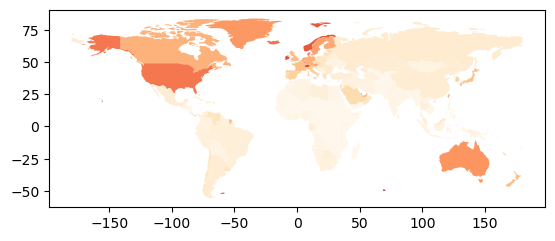

In [10]:
world.plot(column='gdp_per_cap', cmap='OrRd')
plt.show()

### Plot only boundaries

To make the color transparent for when you just want to show the boundary, you have two options. One option is to do **world.plot(facecolor="none", edgecolor="black")**. However, this can cause a lot of confusion because "none" and None are different in the context of using facecolor and they do opposite things. None does the “default behavior” based on matplotlib, and if you use it for facecolor, it actually adds a color. The second option is to use <u>**world.boundary.plot()**</u>. This option is more explicit and clear.

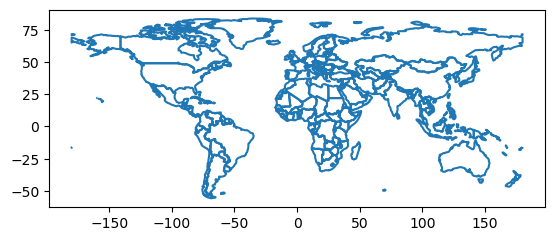

In [11]:
world.boundary.plot()
plt.show()

#### Choropleth with mapclassify

<u>The way color maps are scaled can also be manipulated with the scheme option</u>. The scheme option can be set to any scheme provided by mapclassify (e.g. ‘box_plot’, ‘equal_interval’, ‘fisher_jenks’, ‘fisher_jenks_sampled’, ‘headtail_breaks’, ‘jenks_caspall’, ‘jenks_caspall_forced’, ‘jenks_caspall_sampled’, ‘max_p_classifier’, ‘maximum_breaks’, ‘natural_breaks’, ‘quantiles’, ‘percentiles’, ‘std_mean’ or ‘user_defined’). Arguments can be passed in <u>classification_kwds dict</u>. For example :

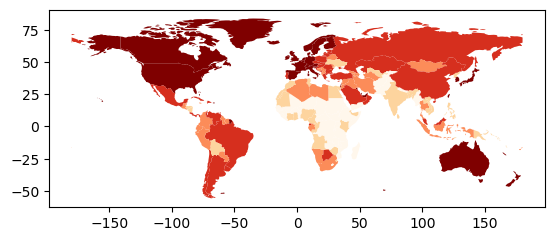

In [13]:
world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles')
plt.show()

### Missing values

c:\Users\pc\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


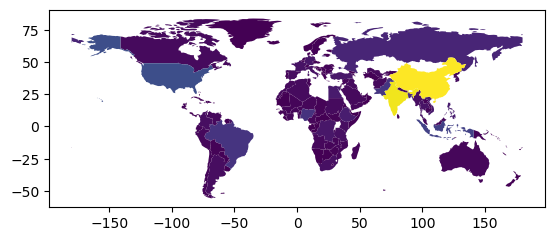

In [46]:
import numpy as np

world.loc[np.random.choice(world.index, 40), 'pop_est'] = np.nan

world.plot(column='pop_est')
plt.show()

However, passing <u>missing_kwds</u> one can specify the style and label of features containing None or NaN.

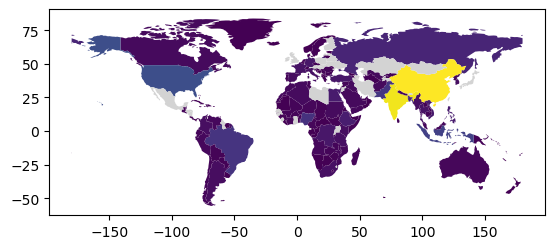

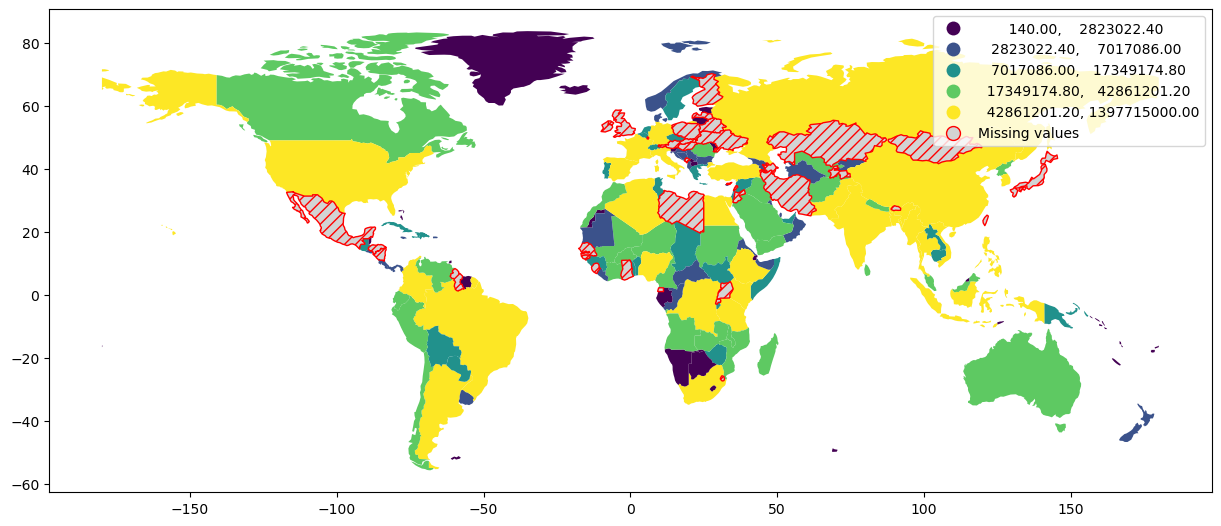

In [47]:
world.plot(column='pop_est', missing_kwds={'color': 'lightgrey'})
plt.show()
world.plot(
    column="pop_est",
    legend=True,
    scheme="quantiles",
    figsize=(15, 10),
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values",
    },
)

plt.show()

## Other map customizations

Pour enlever les axis

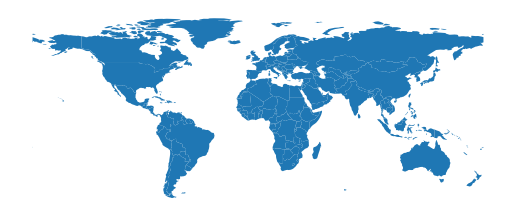

In [48]:
ax = world.plot()
ax.set_axis_off()
plt.show()

## Maps with Layers

### Méthode 1

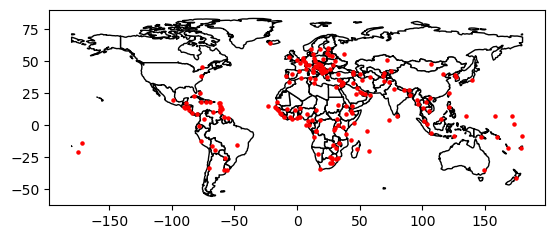

In [49]:
base = world.plot(color='white', edgecolor='black') # On met la map des pays
cities.plot(ax=base, marker='o', color='red', markersize=5) # On rajoute au dessus du meme ax les villes
plt.show()

### Method 2: Using matplotlib objects

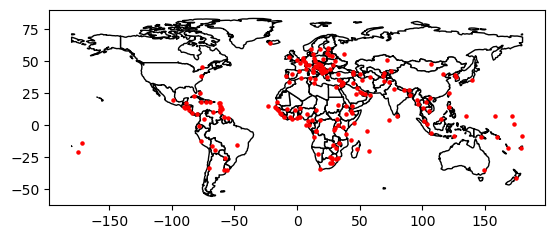

In [50]:
fig, ax = plt.subplots()

ax.set_aspect('equal')
world.plot(ax=ax, color='white', edgecolor='black')
cities.plot(ax=ax, marker='o', color='red', markersize=5)

plt.show()

### Control the order of multiple layers in a plot

When plotting multiple layers, use zorder to take control of the order of layers being plotted. The lower the zorder is, the lower the layer is on the map and vice versa.

Without specified zorder, cities (Points) gets plotted below world (Polygons), following the default order based on geometry types.

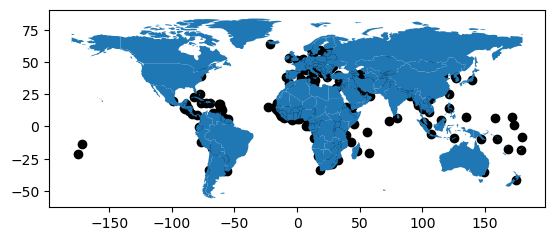

In [51]:
ax = cities.plot(color='k')

world.plot(ax=ax)

plt.show()

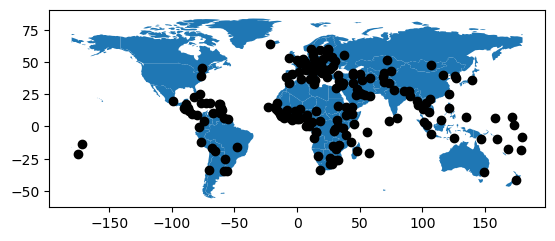

In [52]:
ax = cities.plot(color='k', zorder=2)

world.plot(ax=ax, zorder=1)

plt.show()

## Pandas Plots

Plotting methods also allow for different plot styles from pandas along with the default geo plot. These methods can be accessed using the <u>**kind**</u> keyword argument in plot(), and include:
- **geo** for mapping
- **line** for line plots
- **bar** or **barh** for bar plots
- **hist** for histogram
- **box** for boxplot
- **kde** or **density** for density plots
- **area** for area plots
- **scatter** for scatter plots
- **hexbin** for hexagonal bin plots
- **pie** for pie plots

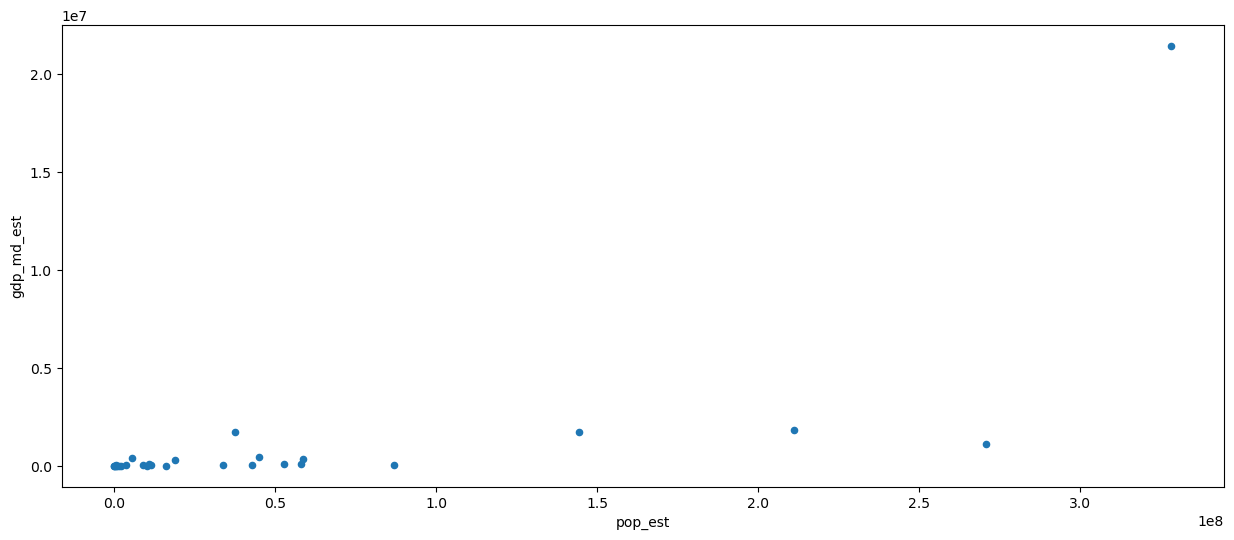

In [56]:
gdf = world.head(30)

gdf.plot(kind='scatter', x="pop_est", y="gdp_md_est", figsize=(15,6))
plt.show()

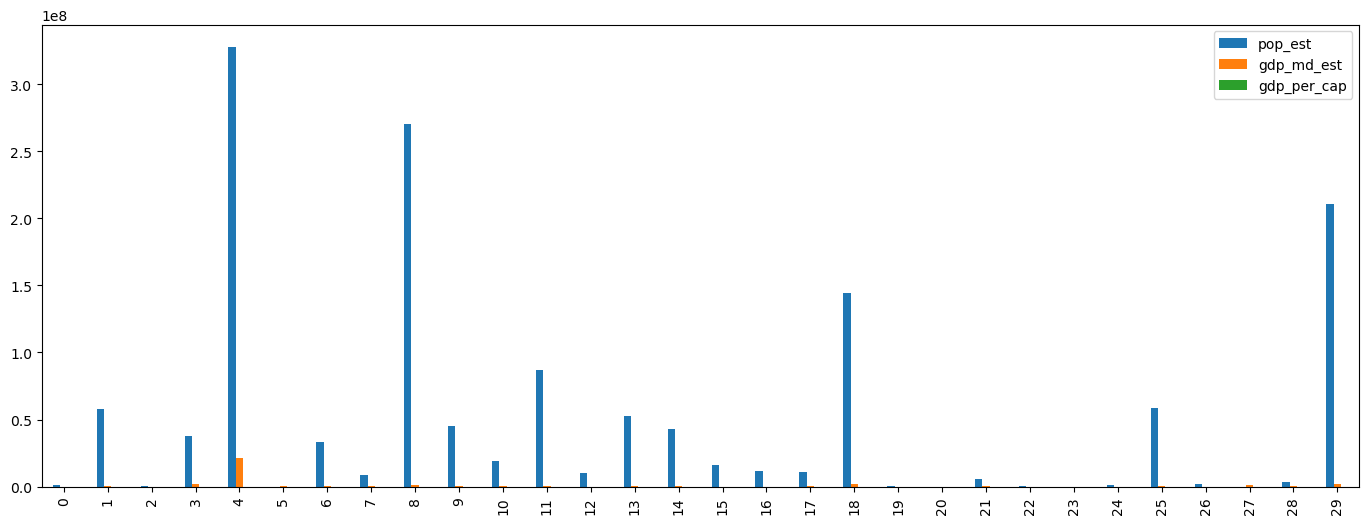

In [58]:
gdf.plot.bar(figsize=(17,6))
plt.show()